In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# import scipy as sp
import matplotlib as mpl
print(f"NumPy version: {np.__version__}")
# print(f"SciPy version: {sp.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

from scipy.sparse import csc_matrix, kron, eye, identity
from scipy.sparse.linalg import expm

large = 40; med = 25; small = 10
params = {'axes.titlesize': med,
          'axes.titlepad' : med,
          'legend.fontsize': med,
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': med}
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["text.usetex"] = True
plt.rcParams.update(params)

NumPy version: 2.2.5
Matplotlib version: 3.10.0


In [21]:
layer_lst = [2, 3, 4, 5, 6, 7]


path = '/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/cluster_data/' + 'second_derivative_2_3_4_5_6_7'
os.chdir(path)

unitary_grad_first_derivative_dict = {}
dissipative_grad_first_derivative_dict = {}

b = 0
for epsilon in epsilon_lst:
     epsilon = round(epsilon, 5)
     os.chdir(path + f'/b{b}')     
     b += 1
     grad_lst = []
     dissipative_grad_lst = []
     for layer in layer_lst:
          average_gradients_unitary = np.load(f'unitary_gradients_history_epsilon_{epsilon}_{layer}_layers.npy')
          grad_lst.append(np.mean(np.abs(average_gradients_unitary)))
          average_gradients_dissipative = np.load(f'dissipative_gradients_history_epsilon_{epsilon}_{layer}_layers.npy')
          dissipative_grad_lst.append(np.mean(np.abs(average_gradients_dissipative)))
     unitary_grad_first_derivative_dict[epsilon] = grad_lst
     dissipative_grad_first_derivative_dict[epsilon] = dissipative_grad_lst

# Second derivative of the cost function with respect to the parameters
b = 0
unitary_grad_second_derivative_dict = {}
dissipative_grad_second_derivative_dict = {}
for epsilon in epsilon_lst:
     epsilon = round(epsilon, 5)
     os.chdir(path + f'/b{b}')     
     b += 1
     grad_lst = []
     dissipative_grad_lst = []
     for layer in layer_lst:
          average_gradients_unitary = np.load(f'unitary_hessian_history_epsilon_{epsilon}_{layer}_layers.npy')
          grad_lst.append(np.mean(np.abs(average_gradients_unitary)))
          average_gradients_dissipative = np.load(f'dissipative_hessian_history_epsilon_{epsilon}_{layer}_layers.npy')
          dissipative_grad_lst.append(np.mean(np.abs(average_gradients_dissipative)))
     unitary_grad_second_derivative_dict[epsilon] = grad_lst
     dissipative_grad_second_derivative_dict[epsilon] = dissipative_grad_lst

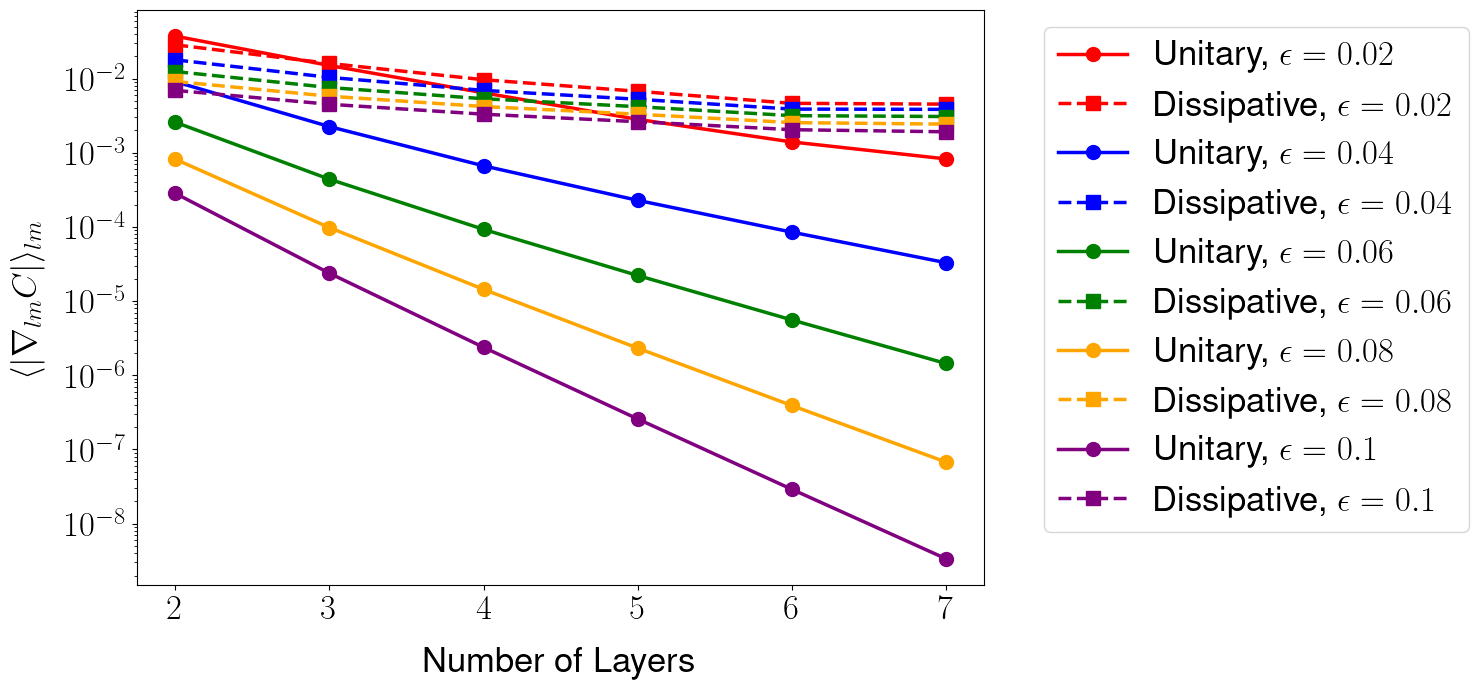

In [19]:
epsilon_lst_to_plot = epsilon_lst[::3][1:]

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'olive', 'teal', 'coral', 'navy', 'gold', 'darkred']
plt.figure(figsize=(15, 7))
for idx, epsilon in enumerate(epsilon_lst_to_plot):
     epsilon = round(float(epsilon), 5)
     plt.plot(layer_lst, unitary_grad_first_derivative_dict[epsilon], label=fr'Unitary, $\epsilon={epsilon}$', marker='o', 
              markersize = 10, color=colors[idx], linewidth = 2.5)
     plt.plot(layer_lst, dissipative_grad_first_derivative_dict[epsilon], label=fr'Dissipative, $\epsilon={epsilon}$', marker='s', markersize = 10, linestyle='--', color=colors[idx], linewidth = 2.5)
plt.xlabel(r'Number of Layers', labelpad = 15)
plt.ylabel(r'$\langle |\nabla_{lm} C| \rangle_{lm}$', labelpad = 15)
plt.xticks(layer_lst)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.yscale('log')
plt.show()

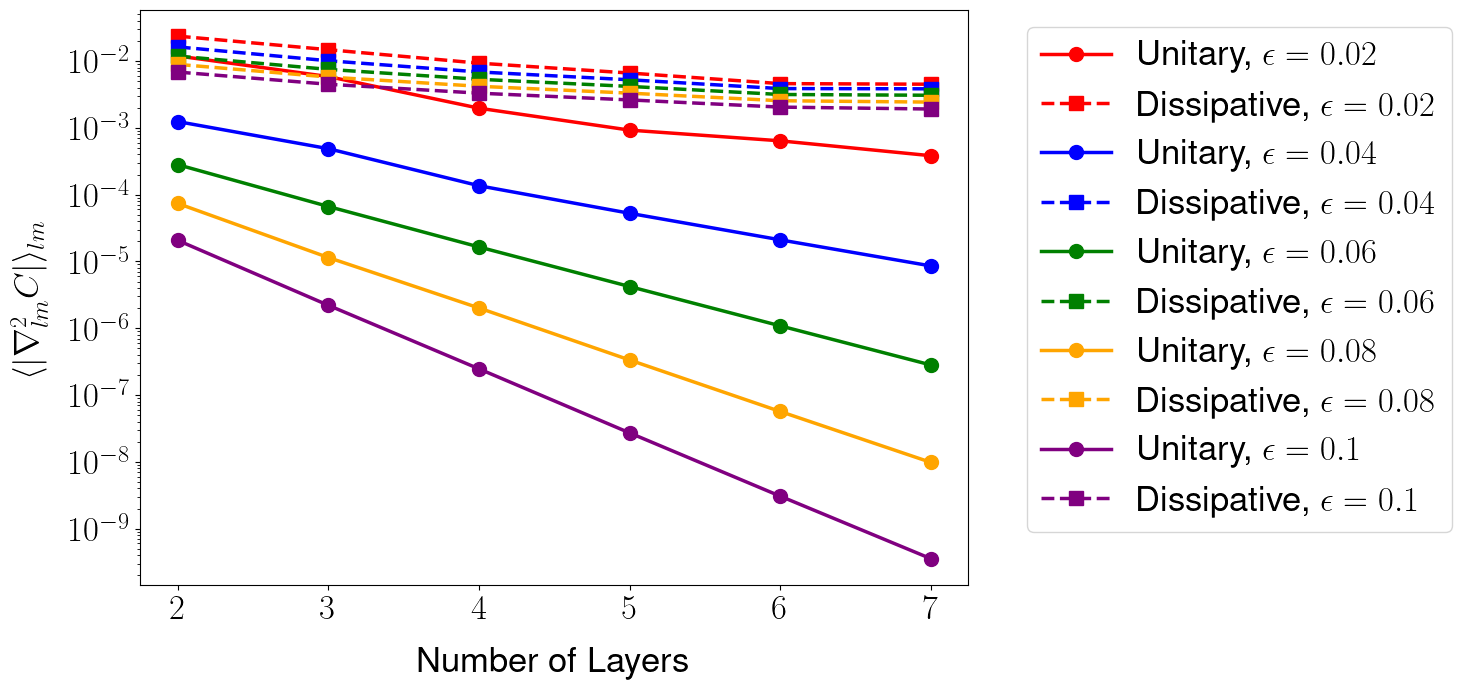

In [22]:
epsilon_lst_to_plot = epsilon_lst[::3][1:]

plt.figure(figsize=(15, 7))
for idx, epsilon in enumerate(epsilon_lst_to_plot):
     epsilon = round(float(epsilon), 5)
     plt.plot(layer_lst, unitary_grad_second_derivative_dict[epsilon], label=fr'Unitary, $\epsilon={epsilon}$', marker='o',
                markersize=10, color=colors[idx], linewidth=2.5)
     plt.plot(layer_lst, dissipative_grad_second_derivative_dict[epsilon], label=fr'Dissipative, $\epsilon={epsilon}$', marker='s',
                markersize=10, linestyle='--', color=colors[idx], linewidth=2.5)
plt.xlabel(r'Number of Layers', labelpad=15)
plt.ylabel(r'$\langle |\nabla^2_{lm} C| \rangle_{lm}$', labelpad=15)
plt.xticks(layer_lst)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.yscale('log')
plt.show()